In [68]:
#This notebook will try to predict cryptocurrency price changes#
#The goal is to be able to accurately use machine learning to predict the next 60 days of changes#
#We will utilize machine learning to see the results of this process# 
#Setup#
import math 
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
from statistics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [69]:
#Pulls Data#
#Prints head and tail#
Doge = pd.read_csv('/Users/Brett/Desktop/DOGE.csv')
print(Doge.head())
print(Doge.tail())


     Date    Open    High     Low   Close
0  1/1/21  0.0047  0.0058  0.0046  0.0057
1  1/2/21  0.0058  0.0143  0.0056  0.0106
2  1/3/21  0.0105  0.0139  0.0091  0.0098
3  1/4/21  0.0098  0.0115  0.0072  0.0098
4  1/5/21  0.0098  0.0103  0.0088  0.0100
       Date    Open    High     Low   Close
185  7/5/21  0.2491  0.2504  0.2269  0.2334
186  7/6/21  0.2334  0.2420  0.2296  0.2312
187  7/7/21  0.2312  0.2384  0.2292  0.2314
188  7/8/21  0.2314  0.2314  0.2067  0.2090
189  7/9/21  0.2089  0.2293  0.1960  0.2204


In [70]:
Doge

,Date,Open,High,Low,Close
0,1/1/21,0.0047,0.0058,0.0046,0.0057
1,1/2/21,0.0058,0.0143,0.0056,0.0106
2,1/3/21,0.0105,0.0139,0.0091,0.0098
3,1/4/21,0.0098,0.0115,0.0072,0.0098
4,1/5/21,0.0098,0.0103,0.0088,0.0100
...,...,...,...,...,...
185,7/5/21,0.2491,0.2504,0.2269,0.2334
186,7/6/21,0.2334,0.2420,0.2296,0.2312
187,7/7/21,0.2312,0.2384,0.2292,0.2314
188,7/8/21,0.2314,0.2314,0.2067,0.2090


In [71]:
#Describes for graphing#

Doge.describe()

,Open,High,Low,Close
count,190.000000,190.000000,190.000000,190.000000
mean,0.178127,0.195878,0.161235,0.179141
std,0.165966,0.183601,0.147524,0.165585
min,0.004700,0.005800,0.004600,0.005700
25%,0.051075,0.054725,0.048950,0.051375
50%,0.068000,0.075250,0.061350,0.069850
75%,0.311775,0.331925,0.292900,0.311625
max,0.672900,0.738700,0.603000,0.674300


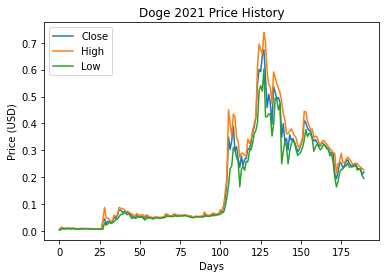

In [72]:
#Price Changes#
plt.figure()
plt.plot(Doge["Close"])
plt.plot(Doge["High"])
plt.plot(Doge["Low"])
plt.title('Doge 2021 Price History')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Close','High', 'Low'], loc='upper left')

plt.show()

In [73]:
#Checks real-time vs predictions using LSTM model#
#Creating a new dataset filtering by closing price#
closedata=Doge.filter(['Close'])
newdata= closedata.values

#Training LSTM#
trainingdata=math.ceil(len(newdata) * .8)
trainingdata

152

In [74]:
#Scales data to make it easier with using LSTM Model#
scaler = MinMaxScaler(feature_range=(0,1))
datascaled= scaler.fit_transform(newdata)
datascaled

array([[0.        ],
       [0.00732875],
       [0.00613222],
       [0.00613222],
       [0.00643135],
       [0.00717918],
       [0.00613222],
       [0.00613222],
       [0.00673048],
       [0.00628178],
       [0.00463655],
       [0.00358959],
       [0.00448699],
       [0.00553395],
       [0.00553395],
       [0.00538439],
       [0.00508525],
       [0.00523482],
       [0.00508525],
       [0.00493569],
       [0.00358959],
       [0.00418786],
       [0.00433742],
       [0.00448699],
       [0.00403829],
       [0.00388872],
       [0.00269219],
       [0.04651511],
       [0.05997607],
       [0.03380197],
       [0.04681424],
       [0.04352378],
       [0.03828896],
       [0.0474125 ],
       [0.07074484],
       [0.0616213 ],
       [0.07777445],
       [0.1081364 ],
       [0.1094825 ],
       [0.09632067],
       [0.10020939],
       [0.09572241],
       [0.0961711 ],
       [0.09063715],
       [0.08525277],
       [0.07583009],
       [0.07149267],
       [0.065

In [75]:
#Create training set#
train_data=datascaled[0:trainingdata, :]

#Splits data into x and y train#
x_train=[] 
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.        , 0.00732875, 0.00613222, 0.00613222, 0.00643135,
       0.00717918, 0.00613222, 0.00613222, 0.00673048, 0.00628178,
       0.00463655, 0.00358959, 0.00448699, 0.00553395, 0.00553395,
       0.00538439, 0.00508525, 0.00523482, 0.00508525, 0.00493569,
       0.00358959, 0.00418786, 0.00433742, 0.00448699, 0.00403829,
       0.00388872, 0.00269219, 0.04651511, 0.05997607, 0.03380197,
       0.04681424, 0.04352378, 0.03828896, 0.0474125 , 0.07074484,
       0.0616213 , 0.07777445, 0.1081364 , 0.1094825 , 0.09632067,
       0.10020939, 0.09572241, 0.0961711 , 0.09063715, 0.08525277,
       0.07583009, 0.07149267, 0.06551002, 0.07941968, 0.07373617,
       0.07253964, 0.07538139, 0.0717918 , 0.06266826, 0.07642836,
       0.06610829, 0.06715525, 0.06655698, 0.06371523, 0.06715525])]
[0.06670655100209394]



In [76]:
#Convert to arrays#
x_train, y_train = np.array(x_train), np.array(y_train)

In [77]:
#Reshapes data#
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.        ],
        [0.00732875],
        [0.00613222],
        ...,
        [0.06655698],
        [0.06371523],
        [0.06715525]],

       [[0.00732875],
        [0.00613222],
        [0.00613222],
        ...,
        [0.06371523],
        [0.06715525],
        [0.06670655]],

       [[0.00613222],
        [0.00613222],
        [0.00643135],
        ...,
        [0.06715525],
        [0.06670655],
        [0.06700568]],

       ...,

       [[0.07194137],
        [0.08435537],
        [0.07777445],
        ...,
        [0.4862399 ],
        [0.45827101],
        [0.43209692]],

       [[0.08435537],
        [0.07777445],
        [0.07463356],
        ...,
        [0.45827101],
        [0.43209692],
        [0.44690398]],

       [[0.07777445],
        [0.07463356],
        [0.07747532],
        ...,
        [0.43209692],
        [0.44690398],
        [0.4738259 ]]])

In [78]:
#LSTM model being built to test what it should be#
lstmmodel= Sequential()
lstmmodel.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
lstmmodel.add(LSTM(50, return_sequences=False))
lstmmodel.add(Dense(25))
lstmmodel.add(Dense(1))

In [79]:
#Model Continues MSE#
lstmmodel.compile(optimizer='adam', loss= 'mean_squared_error')

In [80]:
#LSTM Model Trained#
lstmmodel.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
92/92 [==============================] - 7s 36ms/step - loss: 0.0558
Epoch 2/3
92/92 [==============================] - 4s 40ms/step - loss: 0.0234
Epoch 3/3
92/92 [==============================] - 3s 31ms/step - loss: 0.0176


In [81]:
#Testing Dataset#
testdata=datascaled[trainingdata -60:, :]

x_test= []
y_test= newdata[trainingdata:,:]
for i in range(60, len(testdata)):
    x_test.append(testdata[i-60:i,0])

In [82]:
#Convert to numpy#
x_test=np.array(x_test)
#Reshapes#
x_test=np.reshape(x_test, (38, 60,1))

In [83]:
#Prediction for Xtest#
pred= lstmmodel.predict(x_test)
pred= scaler.inverse_transform(pred)

<ipython-input-84-49734c30c769>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions']= pred


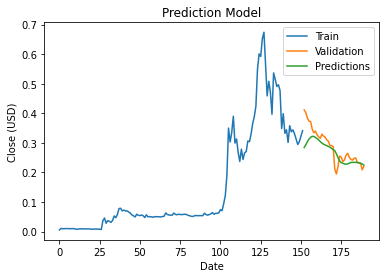

In [84]:
#Plotting Data to show actual verus predictions from the LSTM model#
train= closedata[:trainingdata]
val= closedata[trainingdata:]
val['Predictions']= pred
plt.figure()
plt.title('Prediction Model')
plt.xlabel('Date')
plt.ylabel('Close (USD)')
plt.plot(train['Close'])
plt.plot(val[['Close','Predictions']])
plt.legend(['Train', 'Validation','Predictions'])
plt.show()


In [85]:
#Shows what the predictions based off previous days#
val

,Close,Predictions
152,0.4115,0.284445
153,0.4026,0.293560
154,0.3839,0.304351
155,0.3735,0.313027
156,0.3720,0.318746
157,0.3460,0.322210
158,0.3344,0.321739
159,0.3398,0.318428
160,0.3277,0.314626
161,0.3204,0.309870


In [86]:
#Setup for prediction column# 
futuredays= 60
Doge['Prediction'] = Doge[['Close']].shift(-futuredays)

In [87]:
#Checks to make sure prediction column was added#
Doge

,Date,Open,High,Low,Close,Prediction
0,1/1/21,0.0047,0.0058,0.0046,0.0057,0.0503
1,1/2/21,0.0058,0.0143,0.0056,0.0106,0.0505
2,1/3/21,0.0105,0.0139,0.0091,0.0098,0.0500
3,1/4/21,0.0098,0.0115,0.0072,0.0098,0.0496
4,1/5/21,0.0098,0.0103,0.0088,0.0100,0.0510
...,...,...,...,...,...,...
185,7/5/21,0.2491,0.2504,0.2269,0.2334,NaN
186,7/6/21,0.2334,0.2420,0.2296,0.2312,NaN
187,7/7/21,0.2312,0.2384,0.2292,0.2314,NaN
188,7/8/21,0.2314,0.2314,0.2067,0.2090,NaN


In [88]:
#Creates independent data for predicting#
X= np.array(Doge[['Close']])
X= X[:-futuredays]

In [89]:
#Creates dependent variable for predicting#
y= Doge['Prediction'].values 
y=y[:-futuredays]

In [90]:
#Splits for training purposes#
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .05)

In [91]:
#Creates modelling for training#
from sklearn.linear_model import LinearRegression
LR = LinearRegression() 
LR.fit(x_train, y_train)

LinearRegression()

In [92]:
#Test confidence to see if it is good#
LR_Conf= LR.score(x_test, y_test)
LR_Conf

-0.04757810669689433

In [93]:
#Creating projections for the last 60 days#
x_projection = np.array(Doge[['Close']]) [-futuredays:]
x_projection

array([[0.5084],
       [0.4722],
       [0.3968],
       [0.5367],
       [0.5153],
       [0.4908],
       [0.4968],
       [0.4769],
       [0.3484],
       [0.3989],
       [0.3324],
       [0.3443],
       [0.3015],
       [0.3584],
       [0.3376],
       [0.344 ],
       [0.3308],
       [0.3121],
       [0.2946],
       [0.3045],
       [0.3225],
       [0.3415],
       [0.4115],
       [0.4026],
       [0.3839],
       [0.3735],
       [0.372 ],
       [0.346 ],
       [0.3344],
       [0.3398],
       [0.3277],
       [0.3204],
       [0.3156],
       [0.3299],
       [0.3232],
       [0.3192],
       [0.3102],
       [0.3058],
       [0.2911],
       [0.291 ],
       [0.2872],
       [0.211 ],
       [0.195 ],
       [0.2199],
       [0.2557],
       [0.2515],
       [0.2368],
       [0.2424],
       [0.2584],
       [0.2649],
       [0.2515],
       [0.2443],
       [0.2418],
       [0.2479],
       [0.2491],
       [0.2334],
       [0.2312],
       [0.2314],
       [0.209 

In [94]:
#Prints prediction for the next 60 days#
#Based off our machine learning model we can see what is expect for the next 60 days from 7/9
LR_pred= LR.predict(x_projection)
LR_pred

array([0.28703398, 0.28352709, 0.27622267, 0.28977556, 0.28770243,
       0.28532897, 0.28591023, 0.2839824 , 0.27153389, 0.27642611,
       0.26998388, 0.2711367 , 0.26699042, 0.27250265, 0.27048763,
       0.27110764, 0.26982888, 0.26801731, 0.26632198, 0.26728105,
       0.26902481, 0.27086545, 0.27764674, 0.27678455, 0.27497297,
       0.27396547, 0.27382015, 0.27130139, 0.27017763, 0.27070076,
       0.26952857, 0.26882137, 0.26835637, 0.26974169, 0.26909263,
       0.26870512, 0.26783324, 0.26740699, 0.26598292, 0.26597323,
       0.2656051 , 0.25822318, 0.25667317, 0.25908538, 0.26255352,
       0.26214665, 0.26072257, 0.26126508, 0.26281509, 0.26344478,
       0.26214665, 0.26144914, 0.26120695, 0.26179789, 0.26191414,
       0.2603932 , 0.26018007, 0.26019945, 0.25802943, 0.25913381])

In [96]:
#Saves predictions as CSV, I find it easier to work with# 
from numpy import asarray
from numpy import savetxt
savetxt('DogePred.csv', LR_pred, delimiter=',')

In [97]:
DogePred= pd.read_csv('/Users/Brett/Desktop/DogePred.csv')
DogePred


,Date,Close
0,1/1/21,0.0057
1,1/2/21,0.0106
2,1/3/21,0.0098
3,1/4/21,0.0098
4,1/5/21,0.0100
...,...,...
245,9/3/21,0.2604
246,9/4/21,0.2602
247,9/5/21,0.2602
248,9/6/21,0.2580


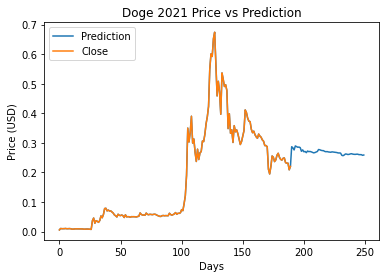

In [98]:
#This plots the prediction vs the actual close. Showing what we are predicting is going to happen# 
plt.figure()
plt.plot(DogePred['Close'])
plt.plot(Doge["Close"])
plt.title('Doge 2021 Price vs Prediction')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Prediction','Close'], loc='upper left')

plt.show()